In [1]:
# Import necessary libraries

# For Data Analysis
import pandas as pd
import numpy as np

# For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Pre-processing
from sklearn.model_selection import train_test_split|

#Classifier libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
df = pd.read_csv("Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Features in the dataset and meaning

- CustomerID:
A unique identifier assigned to each telecom customer, enabling
tracking and identification of individual customers.
- Gender:
The gender of the customer, which can be categorized as male, or
female. This information helps in analyzing gender based trends in
customer churn.
- SeniorCitizen:
A binary indicator that identifies whether the customer is a senior citizen
or not. This attribute helps in understanding if there are any specific
churn patterns among senior customers.
- Partner:
Indicates whether the customer has a partner or not. This attribute helps
in evaluating the impact of having a partner on churn behavior.
- Dependents:
Indicates whether the customer has dependents or not. This attribute
helps in assessing the influence of having dependents on customer
churn.
- Tenure:
The duration for which the customer has been subscribed to the telecom
service. It represents the loyalty or longevity of the customer’s
relationship with the company and is a significant predictor of churn.
- PhoneService:
Indicates whether the customer has a phone service or not. This attribute
helps in understanding the impact of phone service on churn.
- MultipleLines:
Indicates whether the customer has multiple lines or not. This attribute helps in analyzing
the effect of having multiple lines on customer churn.
- InternetService:
Indicates the type of internet service subscribed by the customer, such as DSL, fiber optic,
or no internet service. It helps in evaluating the relationship between internet service and
churn.
- OnlineSecurity:
Indicates whether the customer has online security services or not. This attribute helps in
analyzing the impact of online security on customer churn.
- OnlineBackup:
Indicates whether the customer has online backup services or not. This attribute helps in
evaluating the impact of online backup on churn behavior.
- DeviceProtection:
Indicates whether the customer has device protection services or not. This attribute helps
in understanding the influence of device protection on churn.
- TechSupport:
Indicates whether the customer has technical support services or not. This attribute helps
in assessing the impact of tech support on churn behavior.
- StreamingTV:
Indicates whether the customer has streaming TV services or not. This attribute helps in
evaluating the impact of streaming TV on customer churn.
- StreamingMovies:
Indicates whether the customer has streaming movie services or not. This attribute helps in understanding the influence
of streaming movies on churn behavior.
- Contract:
Indicates the type of contract the customer has, such as a month to month, one year, or two year contract. It is a crucial
factor in predicting churn as different contract lengths may have varying impacts on customer loyalty.
- PaperlessBilling:
Indicates whether the customer has opted for paperless billing or not. This attribute helps in analyzing the effect of
paperless billing on customer churn.
- PaymentMethod:
Indicates the method of payment used by the customer, such as electronic checks, mailed checks, bank transfers, or credit
cards. This attribute helps in evaluating the impact of payment methods on churn.
- MonthlyCharges:
The amount charged to the customer on a monthly basis. It helps in understanding the relationship between monthly
charges and churn behavior.
- TotalCharges:
The total amount charged to the customer over the entire tenure. It represents the cumulative revenue generated from the
customer and may have an impact on churn.
- Churn:
The target variable indicates whether the customer has churned (canceled the service) or not. It is the main variable to
predict in telecom customer churn analysis.

In [3]:
# Data Verification - Data type, number of features and rows, missing data, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# statistical Analysis of the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## NOTE
1. SeniorCitizen:
- Count:
Indicates that there are 7,043 records in the dataset.
- Mean:
The mean of 0.162 suggests that around 16.2% of the customers are senior citizens.
- Standard Deviation:
With a standard deviation of 0.369, there is some variability in the distribution of senior citizens.
- min-max
Provides the range of values: 0 (non-senior) and 1 (senior).
25% of customers are senior citizens, as indicated by the 75th percentile.

2. Tenure:
Indicates the range of tenure from 0 to 72 months.

3. MonthlyCharges:
Provides the range of monthly charges from 18.25 to 118.75.

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<Axes: >

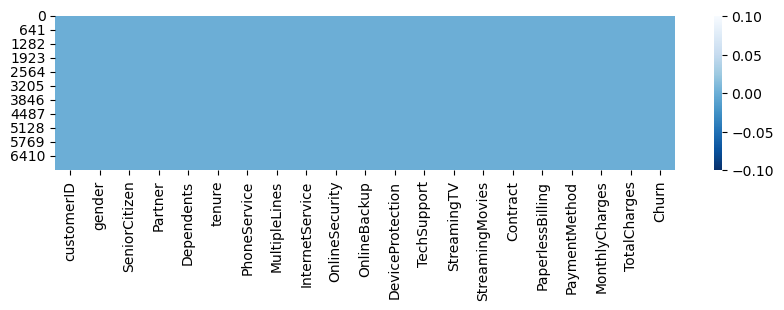

In [5]:
# Check for missing data
print(df.isnull().sum())

# Visualizing the missing data
plt.figure(figsize = (10, 2))
sns.heatmap(df.isnull(), cbar = True, cmap='Blues_r')

In [6]:
# check for duplicate values

df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [7]:
# Unique values in each column

df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

## NOTES
 

1. Majority of customers are loyal patrons and veteran customers

2. The dataset is clean, containing no missing values or duplicate records, ensuring the reliability of the subsequent analysis and modeling steps.

## Exploratory Data Analysis
### Univariate Analysis

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Text(0.5, 1.0, 'Visualizing the tenure bracket of customers')

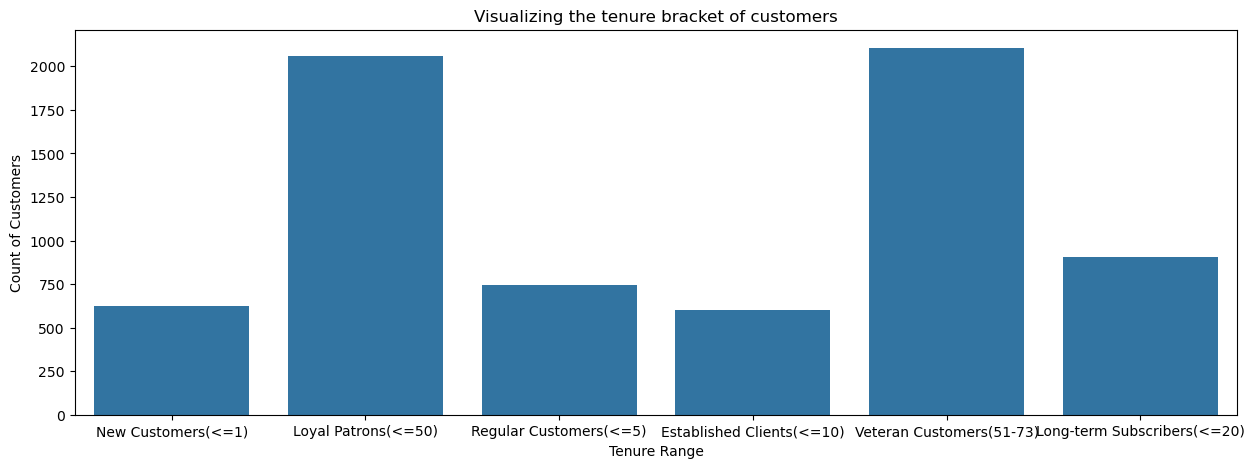

In [65]:
# Data Visualization
# Age bracket
def tenure_bracket(tenure):
    if tenure <= 1:
        return "New Customers(<=1)"
    elif tenure <= 5:
        return "Regular Customers(<=5)"
    elif tenure <=10:
        return "Established Clients(<=10)"
    elif tenure <=20:
        return "Long-term Subscribers(<=20)"
    elif tenure <=50:
        return "Loyal Patrons(<=50)"
    else:
        return "Veteran Customers(51-73)"
    
df["tenure_bracket"] = df['tenure'].apply(tenure_bracket)

# Visualizing the tenure range of customers
plt.figure(figsize = (15, 5))
sns.countplot(x= 'tenure_bracket', data=df)
plt.xlabel('Tenure Range')
plt.ylabel('Count of Customers')
plt.title('Visualizing the tenure bracket of customers')

- Majority of customers are loyal patrons and veteran customers

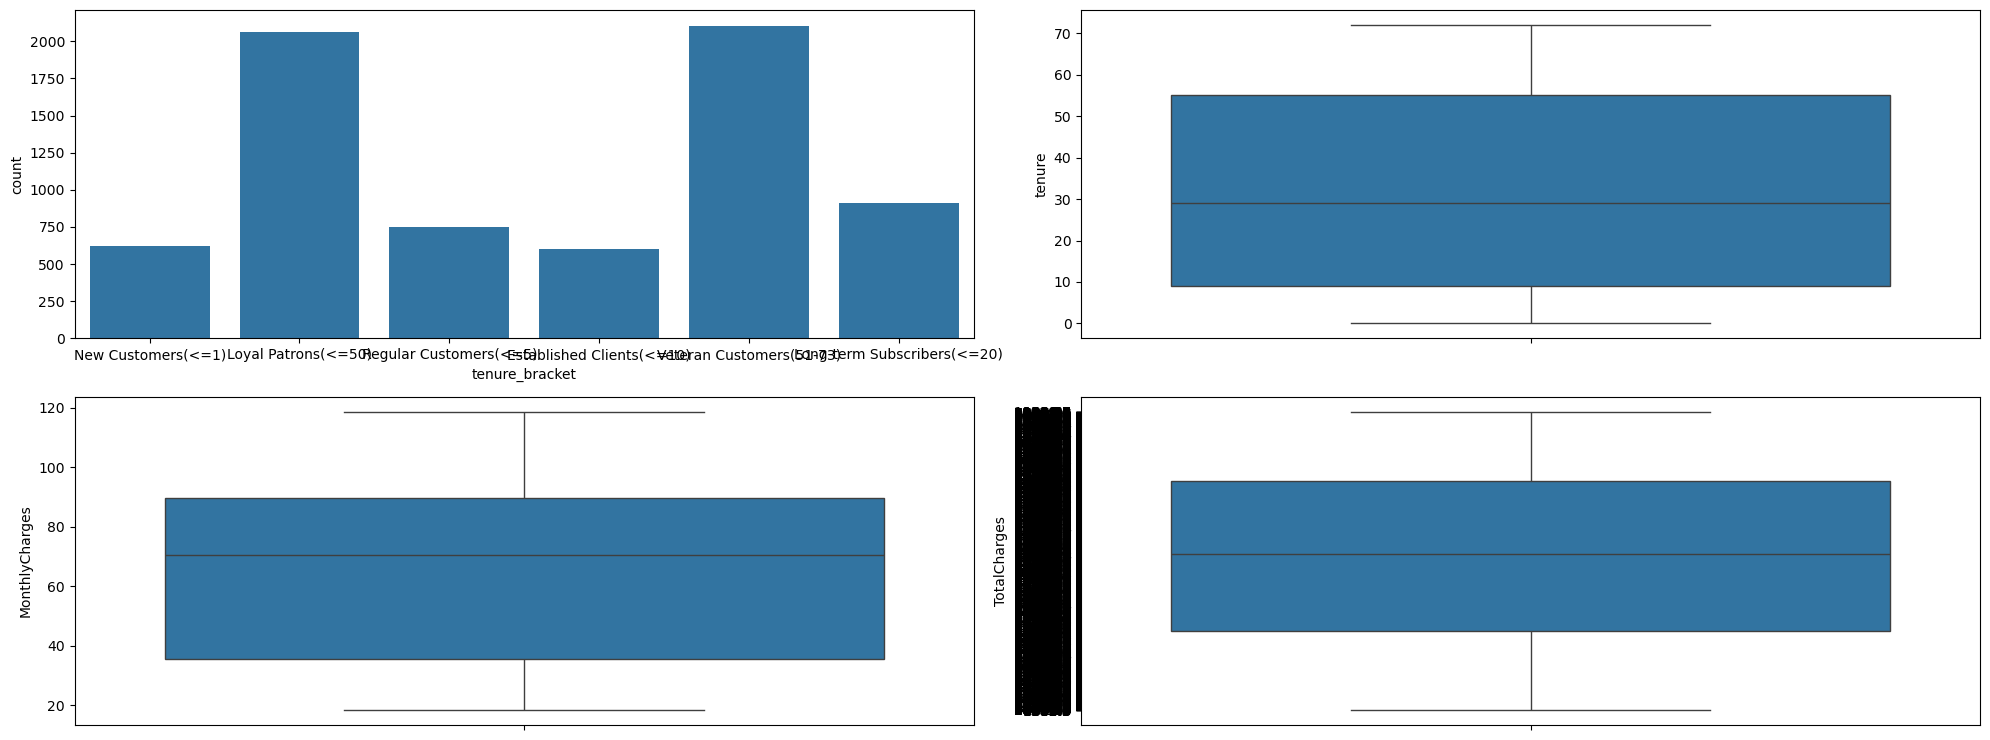

In [67]:
# Check for Outliers
fig, axs = plt.subplots(2,2, figsize = (20, 7.5))
plt1 = sns.countplot(x=df['tenure_bracket'], ax = axs[0,0])
plt1 = sns.boxplot(df['tenure'], ax = axs[0,1])
plt1 = sns.boxplot(df['MonthlyCharges'], ax = axs[1,0])
plt1 = sns.boxplot(df['TotalCharges'], ax = axs[1,1])

plt.tight_layout()

Text(0.5, 1.0, 'Investigating the gender of patients')

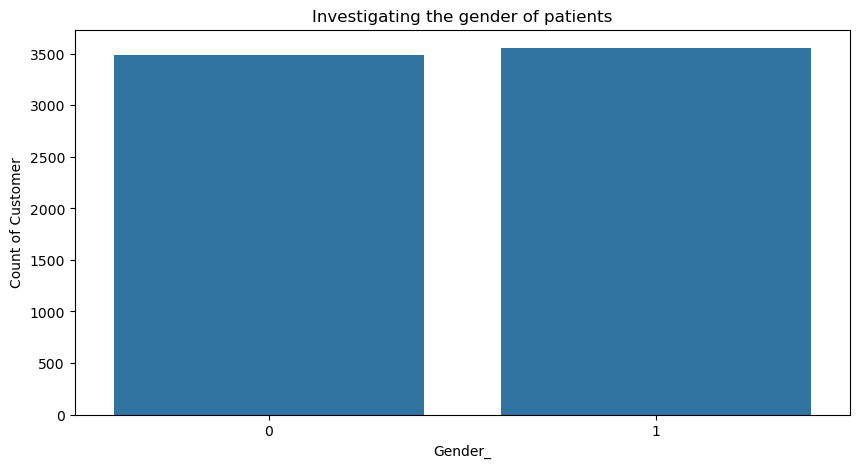

In [13]:
# Data Visualization
# Sex
def sex(gender):
    if gender == "Male":
        return 1
    else:
        return 0
    
df["sex"] = df["gender"].apply(sex)

# Investigating the gender of customers
plt.figure(figsize = (10,5))
sns.countplot(x= 'sex', data=df)
plt.xlabel('Gender_')
plt.ylabel('Count of Customer')
plt.title('Investigating the gender of customers')

In [14]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

Text(0.5, 1.0, 'Customers who have Partners')

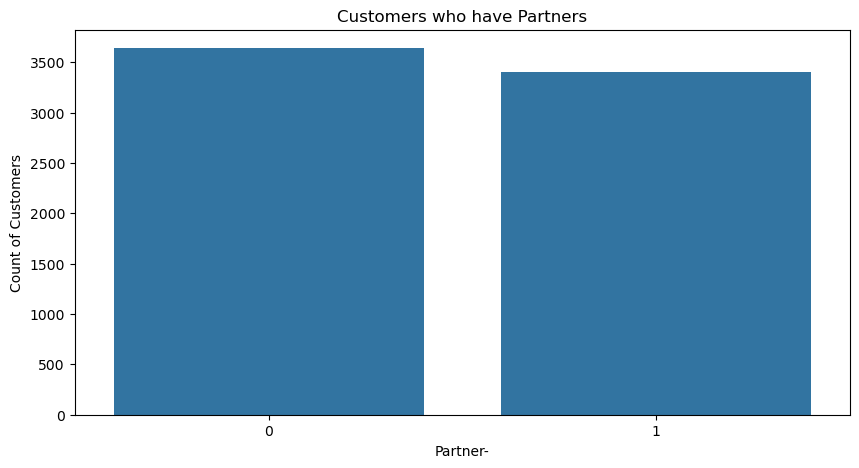

In [15]:
# Data Visualization
# Partner
def partner(Partner):
    if Partner == "Yes":
        return 1
    else:
        return 0
    
df["partner"] = df["Partner"].apply(partner)

# Investigating the customers who have partners
plt.figure(figsize = (10,5))
sns.countplot(x= 'partner', data=df)
plt.xlabel('Partner-')
plt.ylabel('Count of Customers')
plt.title('Customers who have Partners')

### NOTES
Males are slighlty more than females.

Text(0.5, 1.0, 'Customers who have dependents')

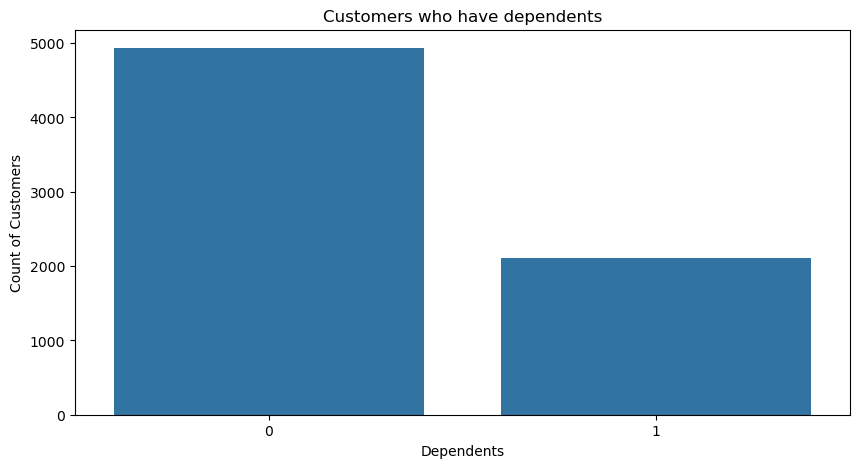

In [16]:
# Data Visualization
# Dependents
def dependent(Dependents):
    if Dependents == "Yes":
        return 1
    else:
        return 0
    
df["dependent"] = df["Dependents"].apply(dependent)

# Investigating the customers who have dependents
plt.figure(figsize = (10,5))
sns.countplot(x= 'dependent', data=df)
plt.xlabel('Dependents')
plt.ylabel('Count of Customers')
plt.title('Customers who have dependents')

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bracket,sex,partner,dependent
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,New Customers(<=1),0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.5,No,Loyal Patrons(<=50),1,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Regular Customers(<=5),1,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,Loyal Patrons(<=50),1,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Regular Customers(<=5),0,0,0


Text(0.5, 1.0, 'Customers who have Phone Service')

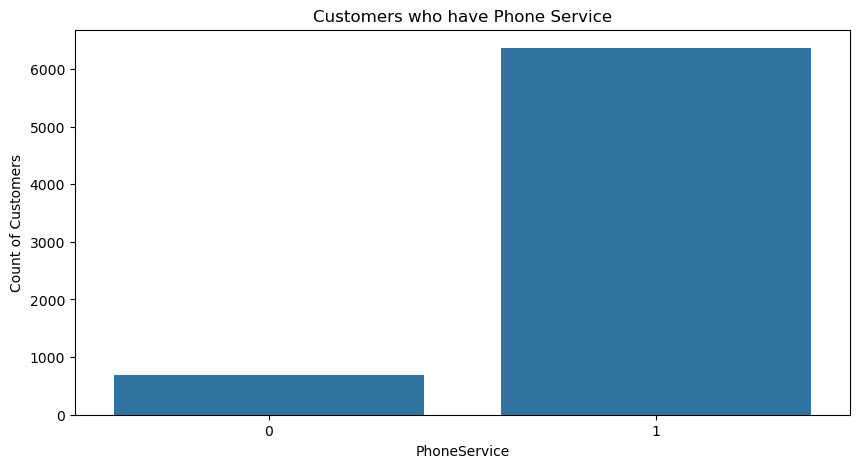

In [18]:
# Data Visualization
# PhoneService
def phoneService(PhoneService):
    if PhoneService == "Yes":
        return 1
    else:
        return 0
    
df["phoneService"] = df["PhoneService"].apply(phoneService)

# Investigating the customers who have dependents
plt.figure(figsize = (10,5))
sns.countplot(x= 'phoneService', data=df)
plt.xlabel('PhoneService')
plt.ylabel('Count of Customers')
plt.title('Customers who have Phone Service')

Text(0.5, 1.0, 'Customers who are on Contract')

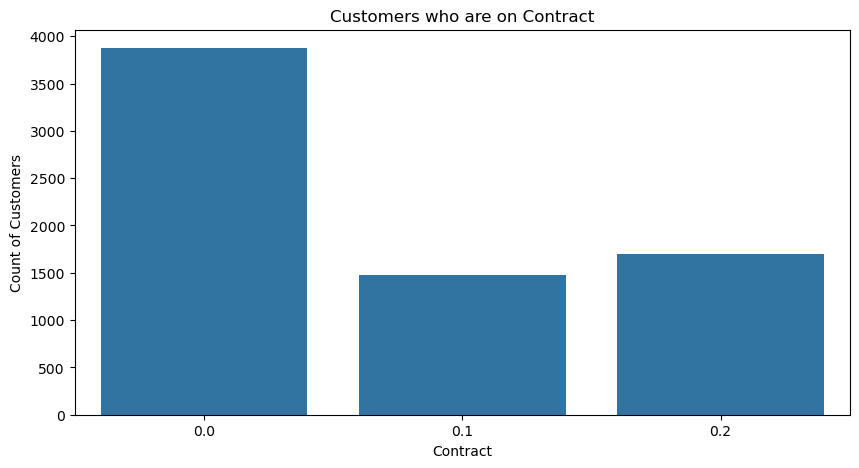

In [19]:
# Data Visualization
# Contract
def contract(Contract):
    if Contract == "Month-to-month":
        return 0.0
    elif Contract == "Two year":
        return 0.2
    else:
        return 0.1
    
df["contract"] = df["Contract"].apply(contract)

# Investigating the customers under each contract
plt.figure(figsize = (10,5))
sns.countplot(x= 'contract', data=df)
plt.xlabel('Contract')
plt.ylabel('Count of Customers')
plt.title('Customers who are on Contract')

Text(0.5, 1.0, 'Customers who have paperless billing')

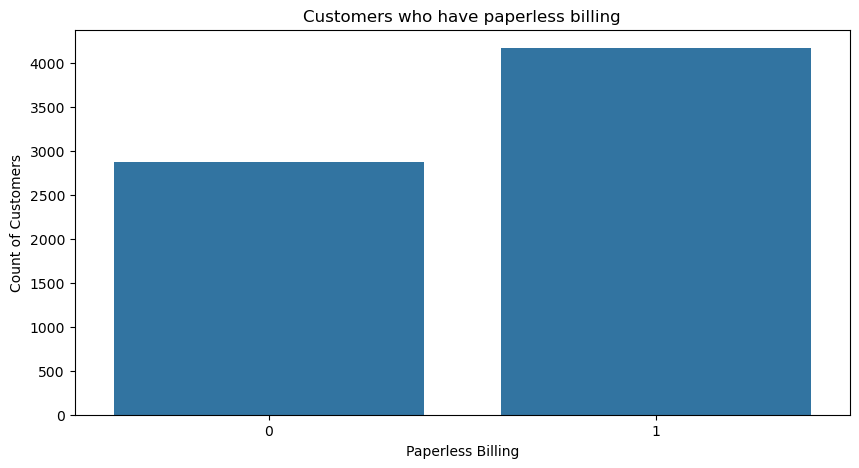

In [20]:
# Data Visualization
# Paperless billing
def paperlessbilling(PaperlessBilling):
    if PaperlessBilling == "Yes":
        return 1
    else:
        return 0
    
df["paperlessbilling"] = df["PaperlessBilling"].apply(paperlessbilling)

# Investigating the customers who have dependents
plt.figure(figsize = (10,5))
sns.countplot(x= 'paperlessbilling', data=df)
plt.xlabel('Paperless Billing')
plt.ylabel('Count of Customers')
plt.title('Customers who have paperless billing')

Text(0.5, 1.0, 'Customers who have online security')

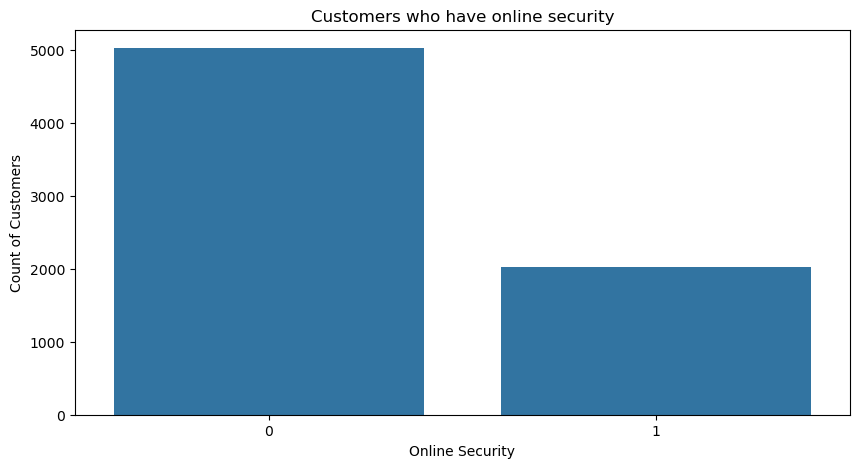

In [21]:
# Data Visualization
# Online Security
def onlinesecurity(OnlineSecurity):
    if OnlineSecurity == "Yes":
        return 1
    else:
        return 0
    
df["onlinesecurity"] = df["OnlineSecurity"].apply(onlinesecurity)

# Investigating the customers who have online security
plt.figure(figsize = (10,5))
sns.countplot(x= 'onlinesecurity', data=df)
plt.xlabel('Online Security')
plt.ylabel('Count of Customers')
plt.title('Customers who have online security')

0    5174
1    1869
Name: label, dtype: int64


Text(0.5, 1.0, 'Total number of Customers')

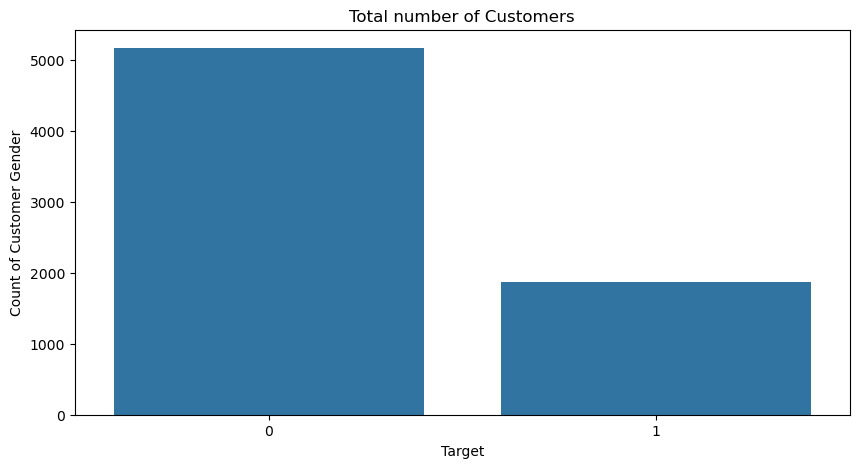

In [22]:
# Data Visualization
# Churn(1=yes, 0 = no)
def label(Churn):
    if Churn == "Yes":
        return 1
    else:
        return 0
    
df["label"] = df["Churn"].apply(label)

# Total customers in each category
print(df["label"].value_counts())

# Investigating the gender of customers
plt.figure(figsize = (10,5))
sns.countplot(x= 'label', data=df)
plt.xlabel('Target')
plt.ylabel('Count of Customer Gender')
plt.title('Total number of Customers')

In [23]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [24]:
# Categorical features
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [25]:
# Categorical features
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

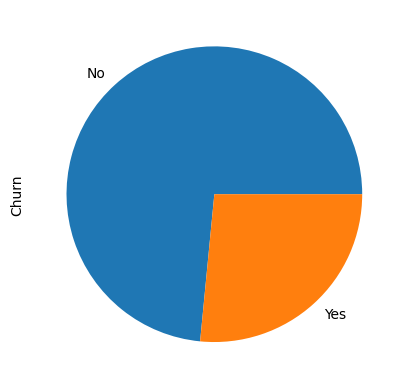

In [63]:
df['Churn'].value_counts().plot(kind='pie');

## Bivariate Analysis
Comparing two features together

Text(0.5, 1.0, 'Total number of Customers')

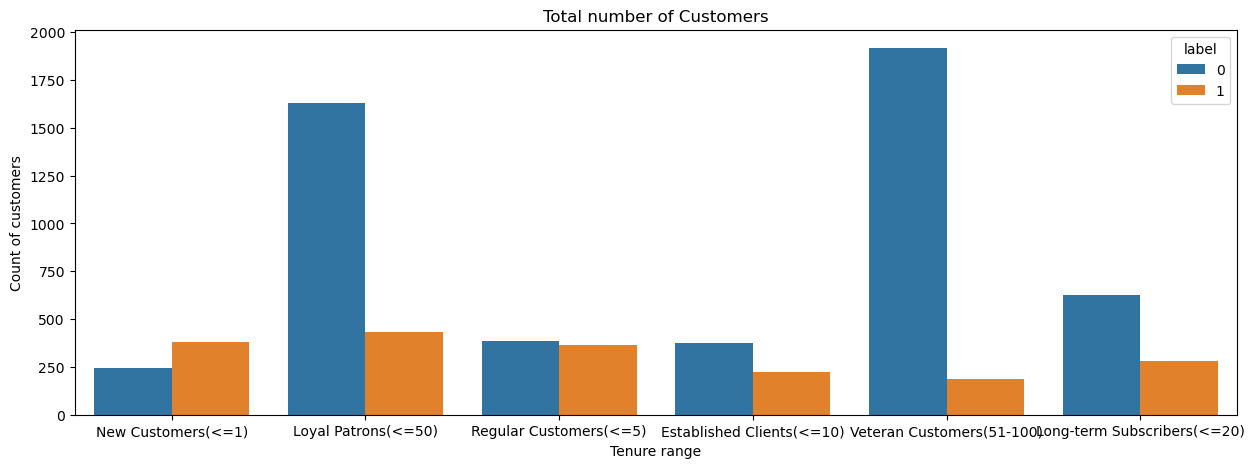

In [26]:
# Investigating the tenure of customers by the target feature
plt.figure(figsize = (15,5))
sns.countplot(x= 'tenure_bracket', data=df, hue='label')
plt.xlabel('Tenure range')
plt.ylabel('Count of customers')
plt.title('Total number of Customers')

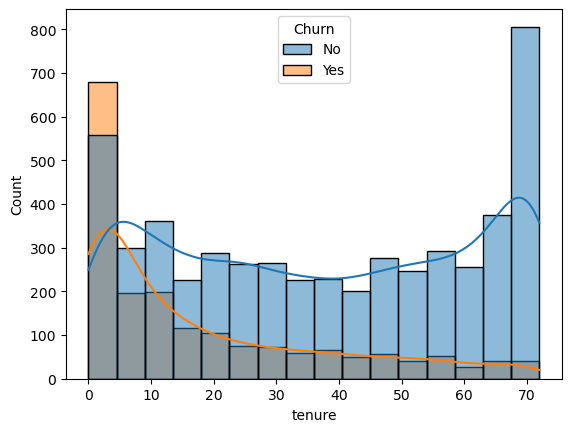

In [27]:
#Visualize the impact of Tenure on Churn
sns.histplot(x='tenure', hue='Churn', data=df, kde=True)
plt.show()


## INSIGHTS
The distribution of tenure exhibits a right-skewed pattern, indicating that a significant portion of customers has relatively lower tenure durations. This right-skewed distribution implies that a substantial number of customers are relatively new or have shorter relationships with the telecom service.
- Veteran customers(51-100) are the least churned in this dataset, 
- Loyal patrons(<=50) are the most churned in this dataset.


In [28]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Churn,tenure_bracket,sex,partner,dependent,phoneService,contract,paperlessbilling,onlinesecurity,label
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,New Customers(<=1),0,1,0,0,0.0,1,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,Loyal Patrons(<=50),1,0,0,1,0.1,0,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,Regular Customers(<=5),1,0,0,1,0.0,1,1,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,Loyal Patrons(<=50),1,0,0,0,0.1,0,1,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,Regular Customers(<=5),0,0,0,1,0.0,1,0,1


Text(0.5, 1.0, 'Total number of Customers')

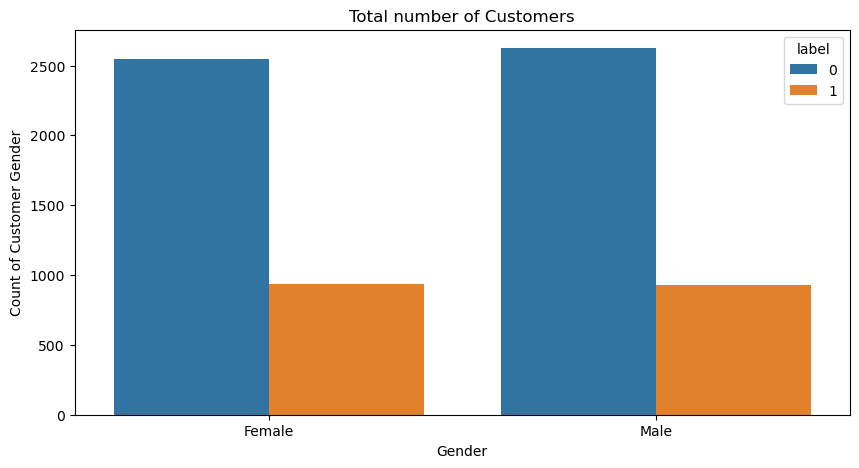

In [29]:
# Investigating the gender of customers by the target feature
plt.figure(figsize = (10,5))
sns.countplot(x= 'gender', data=df, hue='label')
plt.xlabel('Gender')
plt.ylabel('Count of Customer Gender')
plt.title('Total number of Customers')

In [30]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Churn,tenure_bracket,sex,partner,dependent,phoneService,contract,paperlessbilling,onlinesecurity,label
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,New Customers(<=1),0,1,0,0,0.0,1,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,Loyal Patrons(<=50),1,0,0,1,0.1,0,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,Regular Customers(<=5),1,0,0,1,0.0,1,1,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,Loyal Patrons(<=50),1,0,0,0,0.1,0,1,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,Regular Customers(<=5),0,0,0,1,0.0,1,0,1


Text(0.5, 1.0, 'Total number of Customers')

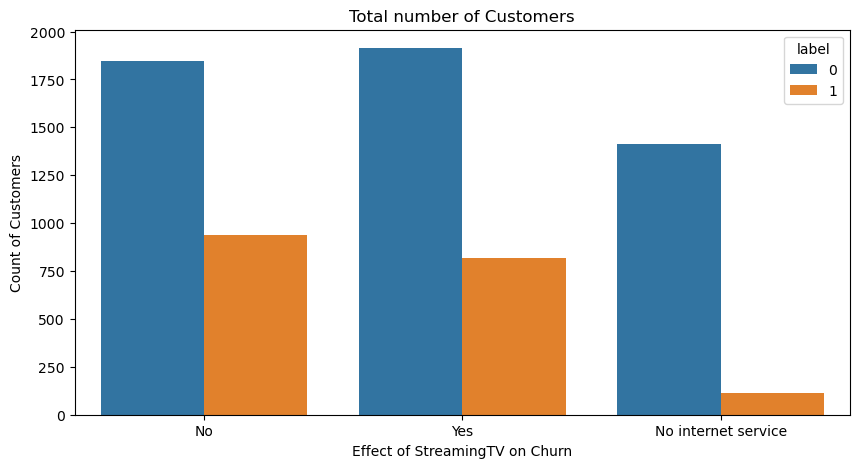

In [31]:
# Investigating the streamingTV effect on customer churn
plt.figure(figsize = (10,5))
sns.countplot(x= 'StreamingMovies', data=df, hue='label')
plt.xlabel('Effect of StreamingTV on Churn')
plt.ylabel('Count of Customers')
plt.title('Total number of Customers')

Text(0.5, 1.0, 'Customers Contract system by the target feature')

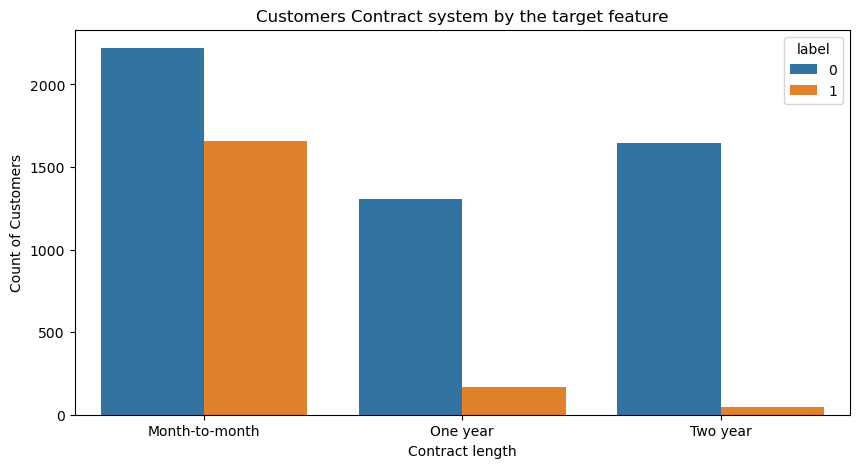

In [32]:
# Investigating the Customers Contract system by the target feature
plt.figure(figsize = (10,5))
sns.countplot(x= 'Contract', data=df, hue='label')
plt.xlabel('Contract length')
plt.ylabel('Count of Customers')
plt.title('Customers Contract system by the target feature')

Text(0.5, 1.0, 'Internet service subscription on Churn')

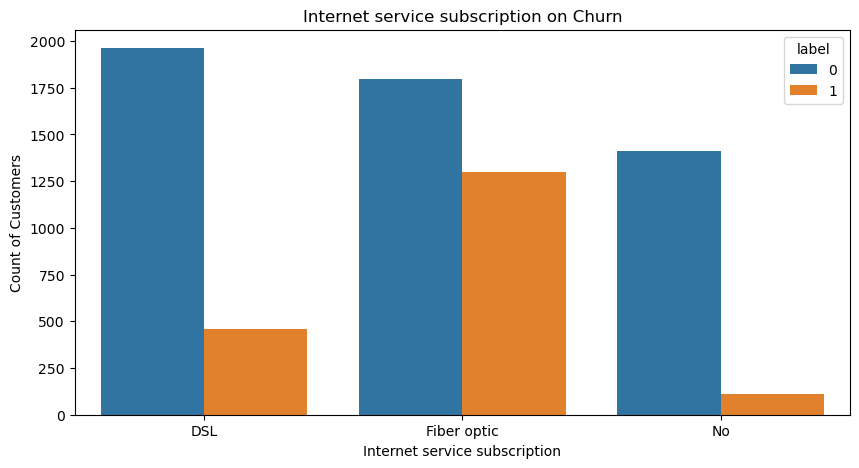

In [33]:
# Investigating the effect of the type of Internet Service subscribed by the customer on Churn
plt.figure(figsize = (10,5))
sns.countplot(x= 'InternetService', data=df, hue='label')
plt.xlabel('Internet service subscription')
plt.ylabel('Count of Customers')
plt.title('Internet service subscription on Churn')

## Note
- Indicates that Customers with fibre optic service have the highest churn rate.
- Indicates that customers with no internet service have the lowest Churn rate.

Text(0.5, 1.0, 'Effect of Paperless billing on Customer Churn')

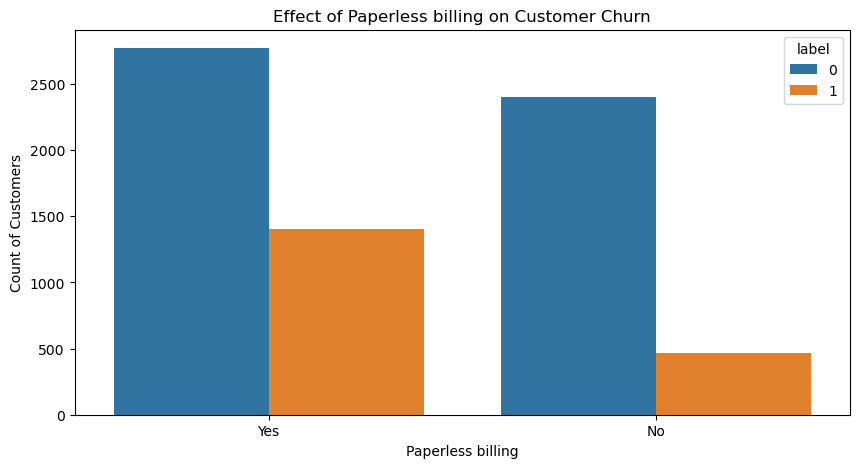

In [34]:
# Investigating the effect of Paperlessbilling on customer Churn
plt.figure(figsize = (10,5))
sns.countplot(x= 'PaperlessBilling', data=df, hue='label')
plt.xlabel('Paperless billing')
plt.ylabel('Count of Customers')
plt.title('Effect of Paperless billing on Customer Churn')

In [35]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Churn,tenure_bracket,sex,partner,dependent,phoneService,contract,paperlessbilling,onlinesecurity,label
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,New Customers(<=1),0,1,0,0,0.0,1,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,Loyal Patrons(<=50),1,0,0,1,0.1,0,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,Regular Customers(<=5),1,0,0,1,0.0,1,1,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,Loyal Patrons(<=50),1,0,0,0,0.1,0,1,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,Regular Customers(<=5),0,0,0,1,0.0,1,0,1


Text(0.5, 1.0, 'Impact of Payment methods on Customer Churn')

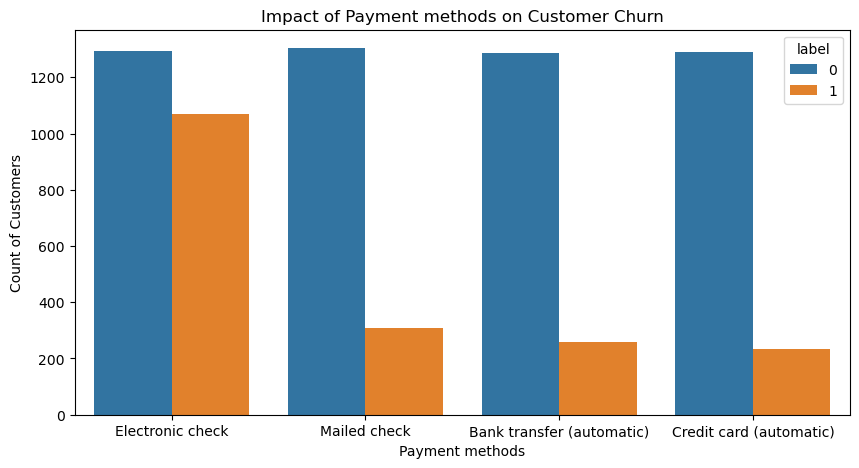

In [36]:
# Investigating the impact of Payment methods on customer Churn
plt.figure(figsize = (10,5))
sns.countplot(x= 'PaymentMethod', data=df, hue='label')
plt.xlabel('Payment methods')
plt.ylabel('Count of Customers')
plt.title('Impact of Payment methods on Customer Churn')

Text(0.5, 1.0, 'Effect of Online Security Churn Behaviour')

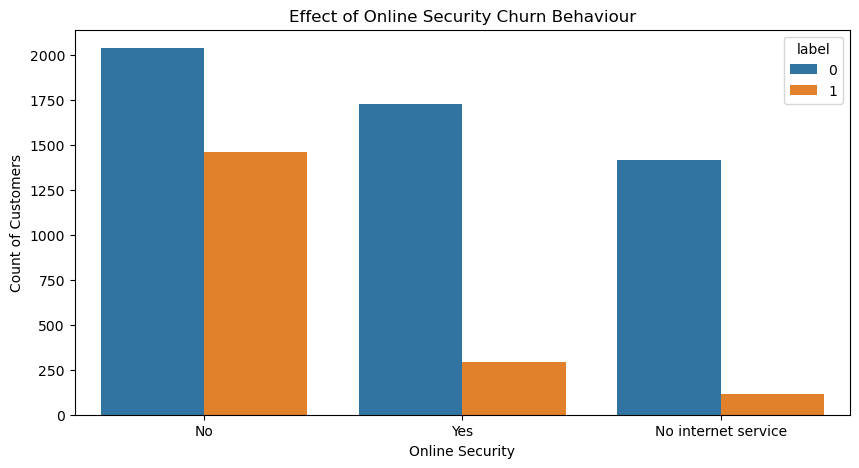

In [37]:
# Investigating the impact of Online Security on Churn behaviour 
plt.figure(figsize = (10,5))
sns.countplot(x= 'OnlineSecurity', data=df, hue='label')
plt.xlabel('Online Security')
plt.ylabel('Count of Customers')
plt.title('Effect of Online Security Churn Behaviour')

### Notes
- Customers who do not have online security service have the highest rate of churn.

Text(0.5, 1.0, 'specific Churn patterns among senior customers')

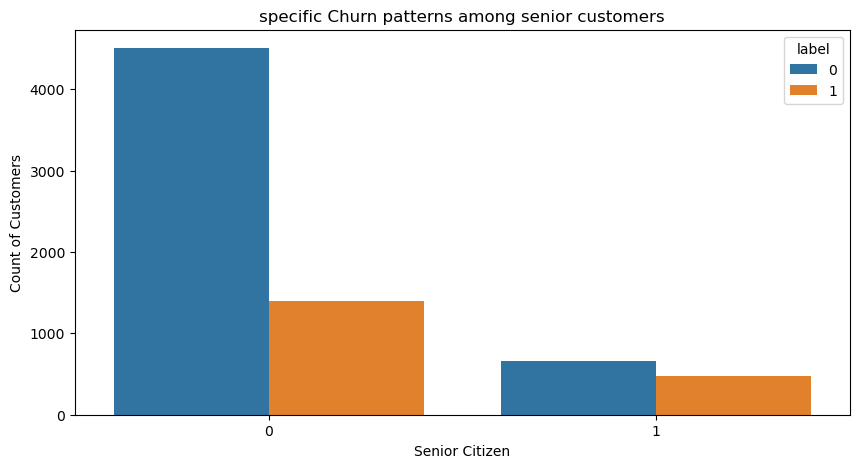

In [38]:
# Investigating specific Churn patterns among senior customers 
plt.figure(figsize = (10,5))
sns.countplot(x= 'SeniorCitizen', data=df, hue='label')
plt.xlabel('Senior Citizen')
plt.ylabel('Count of Customers')
plt.title('specific Churn patterns among senior customers')

Text(0.5, 1.0, 'impact of having a partner on Churn behaviour')

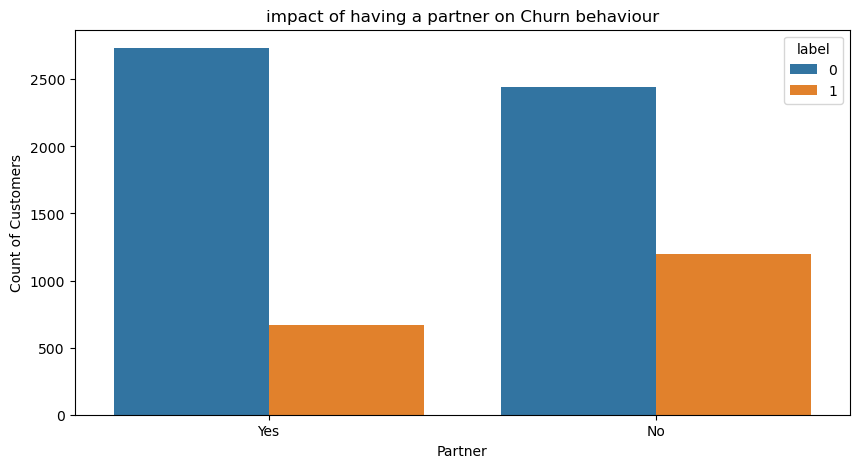

In [39]:
# Investigating the impact of having a partner on Churn behaviour
plt.figure(figsize = (10,5))
sns.countplot(x= 'Partner', data=df, hue='label')
plt.xlabel('Partner')
plt.ylabel('Count of Customers')
plt.title('impact of having a partner on Churn behaviour')

Text(0.5, 1.0, 'assessing the influence of having dependents on customer churn.')

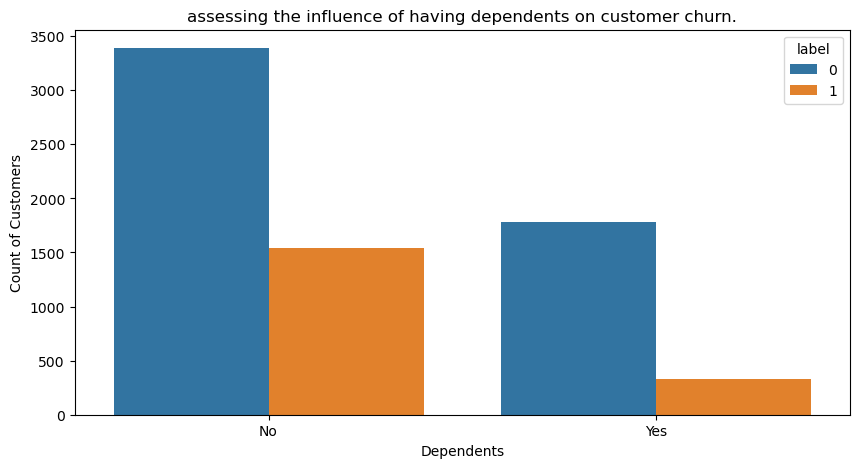

In [40]:
# Investigating the impact of having dependents on Churn behaviour
plt.figure(figsize = (10,5))
sns.countplot(x= 'Dependents', data=df, hue='label')
plt.xlabel('Dependents')
plt.ylabel('Count of Customers')
plt.title('assessing the influence of having dependents on customer churn.')

Text(0.5, 1.0, 'The impact of phone service on churn.')

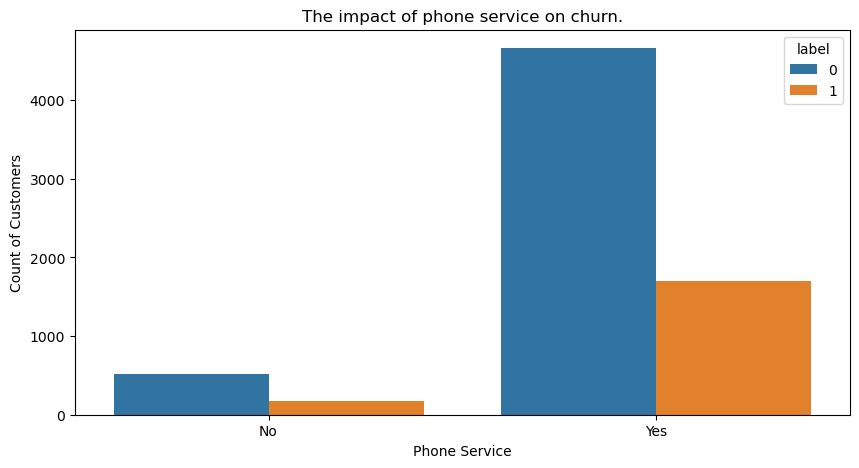

In [41]:
#Investigating the impact of having a partner on Churn behaviour
plt.figure(figsize = (10,5))
sns.countplot(x= 'PhoneService', data=df, hue='label')
plt.xlabel('Phone Service')
plt.ylabel('Count of Customers')
plt.title('The impact of phone service on churn.')

Text(0.5, 1.0, 'Evaluating the impact of online backup on churn behavior.')

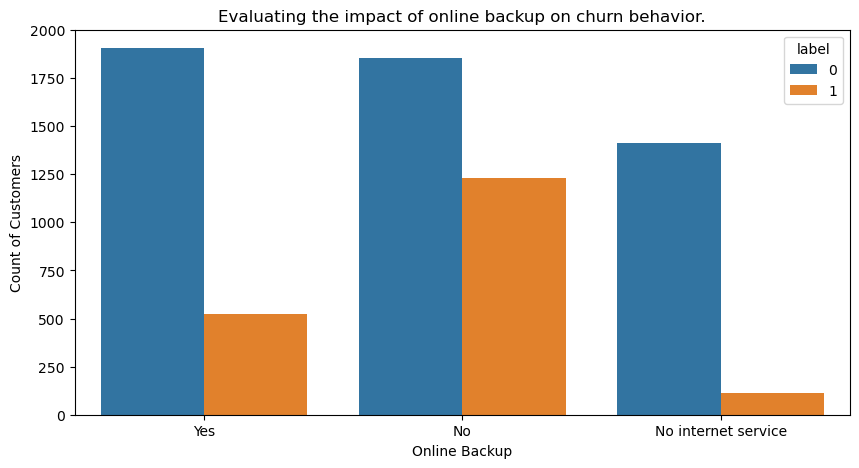

In [42]:
#Investigating the impact of having a partner on Churn behaviour
plt.figure(figsize = (10,5))
sns.countplot(x= 'OnlineBackup', data=df, hue='label')
plt.xlabel('Online Backup')
plt.ylabel('Count of Customers')
plt.title('Evaluating the impact of online backup on churn behavior.')

Text(0.5, 1.0, 'Evaluating the influence of device protection on churn.')

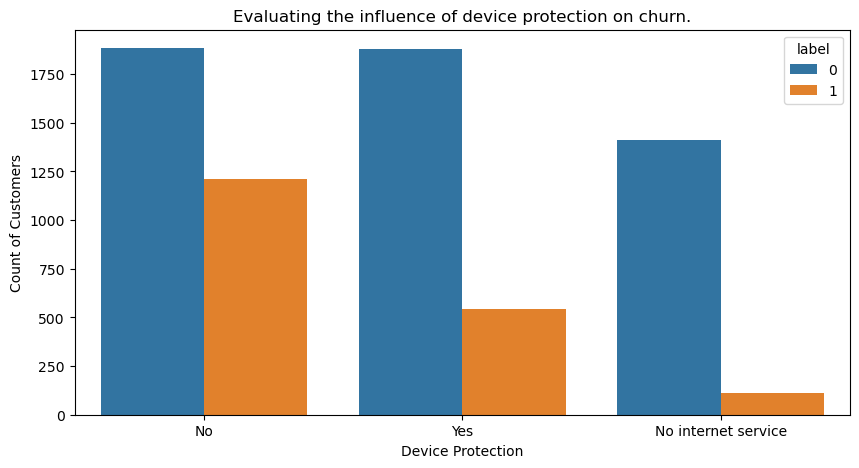

In [43]:
#Investigating the influence of device protection on churn.
plt.figure(figsize = (10,5))
sns.countplot(x= 'DeviceProtection', data=df, hue='label')
plt.xlabel('Device Protection')
plt.ylabel('Count of Customers')
plt.title('Evaluating the influence of device protection on churn.')

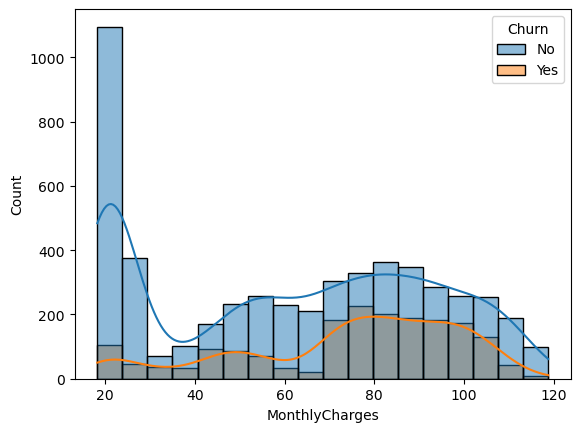

In [44]:
# Visualize the impact of Monthly Charges on Churn
sns.histplot(x='MonthlyCharges', hue='Churn', data=df, kde=True)
plt.show()

## Multivariate Analysis

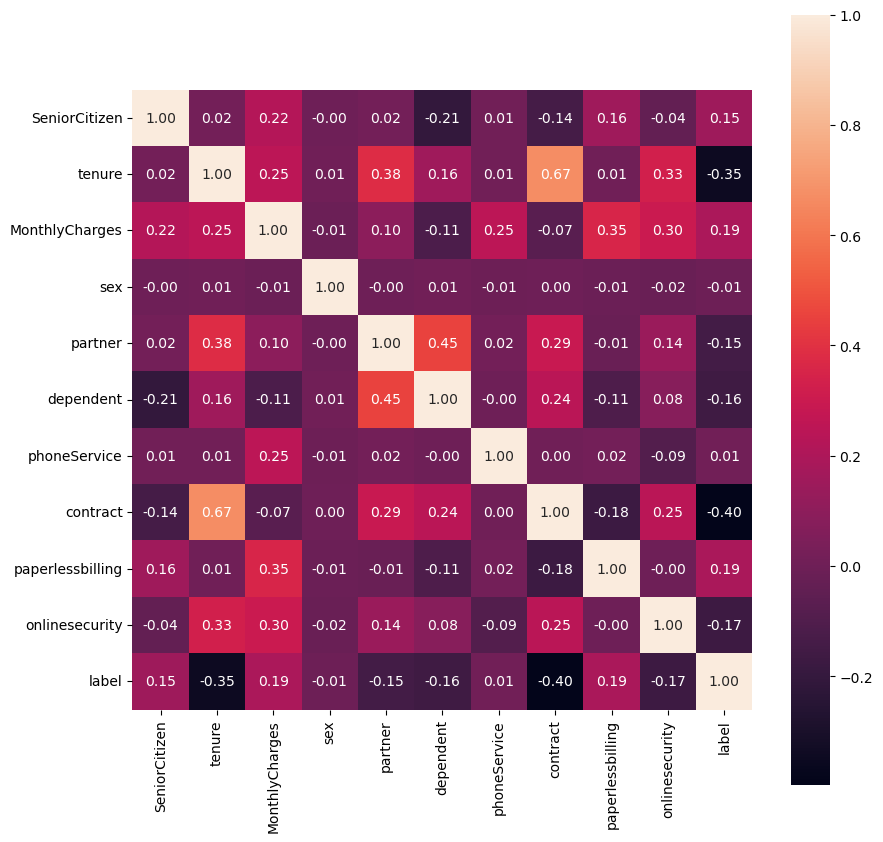

In [45]:
# Correlation between Churn and other variables in the dataset
plt.figure(figsize = (10, 10))

hm = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

### INSIGHTS
- Customers with higher monthly and total charges are more likely to churn.
- Customers who are on long-term contracts and have opted for paperless billing are less likely to churn.
- Senior citizens are more likely to churn, while customers who have online security, device protection, tech support, streaming TV, and streaming movie services are less likely to churn.

### Feature Engineering/Data pre-processing

In [46]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Churn,tenure_bracket,sex,partner,dependent,phoneService,contract,paperlessbilling,onlinesecurity,label
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,New Customers(<=1),0,1,0,0,0.0,1,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,Loyal Patrons(<=50),1,0,0,1,0.1,0,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,Regular Customers(<=5),1,0,0,1,0.0,1,1,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,Loyal Patrons(<=50),1,0,0,0,0.1,0,1,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,Regular Customers(<=5),0,0,0,1,0.0,1,0,1


In [47]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_bracket', 'sex', 'partner', 'dependent', 'phoneService',
       'contract', 'paperlessbilling', 'onlinesecurity', 'label'],
      dtype='object')

In [48]:
# Creating a copy of the data ( Exclude target/label alongside other columns that was created)
df1 = df[['SeniorCitizen', 'sex', 'partner','dependent',
       'tenure', 'phoneService', 'paperlessbilling', 'onlinesecurity', 'MonthlyCharges']]
target = df[['label']]

In [49]:
df1.dtypes

SeniorCitizen         int64
sex                   int64
partner               int64
dependent             int64
tenure                int64
phoneService          int64
paperlessbilling      int64
onlinesecurity        int64
MonthlyCharges      float64
dtype: object

In [50]:
df1.head()

,SeniorCitizen,sex,partner,dependent,tenure,phoneService,paperlessbilling,onlinesecurity,MonthlyCharges
0,0,0,1,0,1,0,1,0,29.85
1,0,1,0,0,34,1,0,1,56.95
2,0,1,0,0,2,1,1,1,53.85
3,0,1,0,0,45,0,0,1,42.30
4,0,0,0,0,2,1,1,0,70.70


## Machine Learning

In [51]:
# Splitting the dataset into training and testing sets
x_train, x_test,y_train, y_test = train_test_split(df1, target, test_size=0.2, random_state=42)

In [52]:
# Model Building

# Logistic Regression

logreg = LogisticRegression() 

logreg.fit(x_train, y_train) #machine learning

ly_pred = logreg.predict(x_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))


Logistic Regression
Accuracy: 0.7963094393186657
Precision: 0.6472602739726028
Recall: 0.5067024128686327
F1-score: 0.568421052631579
AUC-ROC: 0.7036407817238918


## Note
- the model correctly predicted approximately 79.63% of the instances.
- the model achieved a precision of approximately 64.73%, indicating that when it predicts a positive outcome (churn), it is correct about 64.73% of the time.
- Precision: The model achieved a precision of approximately 64.73%, indicating that when it predicts a positive outcome (churn), it is correct about 64.73% of the time.
- Recall: The model captured approximately 50.67% of the actual positive cases.
- F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. In this case, the F1-score is approximately 56.84%.
- An AUC-ROC value of 0.7036 suggests a moderate level of discrimination ability by the model.


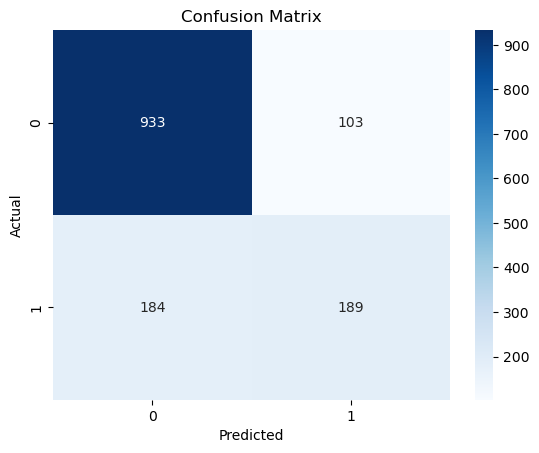

In [53]:
# Create a confusion matrix
lcm = confusion_matrix(y_test, ly_pred)

#Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [54]:
# Model Building
# Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfy_pred = rfc.predict(x_test)

print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", accuracy_score(y_test, rfy_pred))
print("Recall:", accuracy_score(y_test, rfy_pred))
print("F1-score:", accuracy_score(y_test, rfy_pred))
print("AUC-ROC:", accuracy_score(y_test, rfy_pred))

Random Forest Classifier
Accuracy: 0.7700496806245565
Precision: 0.7700496806245565
Recall: 0.7700496806245565
F1-score: 0.7700496806245565
AUC-ROC: 0.7700496806245565


### INSIGHTS
- Accuracy: 0.7722
The accuracy metric measures the overall correctness of the model. In this case, the model correctly predicted approximately 77.22% of the instances.
- Precision: 0.7722
The model achieved a precision of approximately 77.22%, indicating that when it predicts a positive outcome (churn), it is correct about 77.22% of the time.
- Recall: 0.7722
The model captured approximately 77.22% of the actual positive cases.
- F1-score: 0.7722
the F1-score is approximately 77.22%.
- AUC-ROC: 0.7722
An AUC-ROC value of 0.7722 suggests a very good level of discrimination ability by the model.

The Random Forest Classifier model demonstrates strong performance across various metrics, with high accuracy, precision, recall, F1-score, and AUC-ROC. This indicates that the model is effective in making accurate predictions for both positive and negative cases.

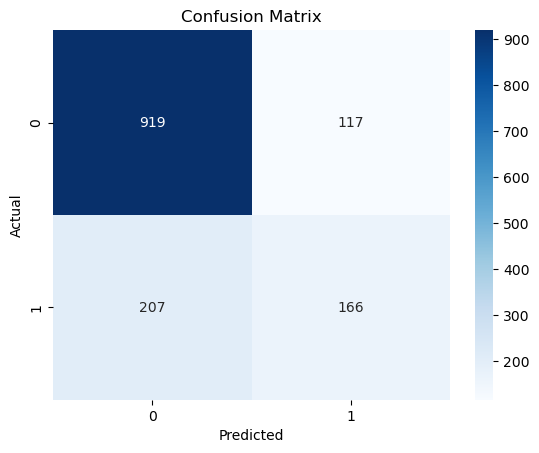

In [55]:
# confusion matrix
rcm = confusion_matrix(y_test, rfy_pred)

#Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [56]:
#Machine learning Algorithm will bw applied to the dataset
classifiers = [
              [RandomForestClassifier(), "Random Forest"],
              [DecisionTreeClassifier(random_state = 42), "Decision tree"],
              [LogisticRegression(), "Logistic Regression"]
              ]

In [57]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(x_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(x_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score =precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    if model_name != classifiers[-1][1]:
        print('')

In [58]:
acc_list

{'Random Forest': ['76.72%'],
 'Decision tree': ['71.04%'],
 'Logistic Regression': ['79.63%']}

In [59]:
print("Accuracy Score")
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,Random Forest,Decision tree,Logistic Regression
0,76.72%,71.04%,79.63%


In [60]:
print("Precision")
s2 = pd.DataFrame(precision_list)
s2.head()

Precision


,Random Forest,Decision tree,Logistic Regression
0,58.01%,45.45%,64.73%


In [61]:
print("Recall")
s3 = pd.DataFrame(recall_list)
s3.head()

Recall


,Random Forest,Decision tree,Logistic Regression
0,43.7%,46.92%,50.67%


In [62]:
print("ROC Score")
s4 = pd.DataFrame(roc_list)
s4.head()

ROC Score


,Random Forest,Decision tree,Logistic Regression
0,66.15%,63.32%,70.36%


## Note
In Conclusion, the Logistic Regression model has the highest ROC score at 70.38%. This means that the model is 70.38% accurate at distinguishing between churners and non-churners.

Overall, the results suggest that all of the models are able to distinguish between churners and non-churners with reasonable accuracy.

## Business Recommendations

The company should be more concerned with reducing false negatives. This is because false negatives can lead to lost revenue and customer loyalty. When a customer churns, the company loses the recurring revenue that the customer was generating. Additionally, churned customers are more likely to leave negative reviews and spread negative word-of-mouth, which can damage the company's reputation.

To reduce false negatives, the company should focus on improving the recall of their churn prediction model.